# Store coarse images
Retreiving coarse images directly may speed up training.  Currently high resolution image is loaded and resized to lower dimensionality for every time the image is called.  

#### Dependencies

In [7]:
import pickle
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

### Load label_dictionary

In [3]:
with open('label_dictionary.pickle', 'rb') as handle :
    label_dictionary = pickle.load(handle)

In [4]:
len(label_dictionary)

3777

### Test image

In [5]:
key = list(label_dictionary.keys())[0]
print(key)

data/train/BET/img_01440.jpg


In [6]:
img = misc.imread(key, mode = 'RGB')
img_sc = misc.imresize(img, size = [64,112,3], mode = 'RGB')

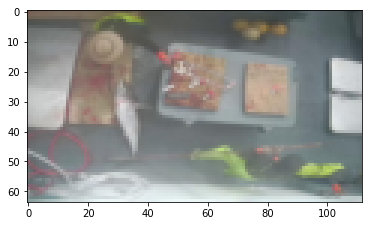

In [8]:
plt.imshow(img_sc)
plt.show()

In [12]:
key

'data/train/BET/img_01440.jpg'

In [19]:
new_key = '/data/coarse_'+key[5:]
print(new_key)

data/coarse_train/BET/img_01440.jpg


In [24]:
misc.imsave(new_key, img_sc, format = 'JPEG')

## Experiment on speed of image load

In [26]:
from datetime import datetime

In [27]:
for _ in range(10) :
    start = datetime.now()
    img_sc = misc.imresize(misc.imread(key, mode = 'RGB'), size = [64,112,3])
    end = datetime.now()
    print("Time: {}".format((end - start).total_seconds()))

Time: 0.08972
Time: 0.066086
Time: 0.061913
Time: 0.059596
Time: 0.076676
Time: 0.068439
Time: 0.062025
Time: 0.064031
Time: 0.076414
Time: 0.067572


In [28]:
for _ in range(10) :
    start = datetime.now()
    img_sc = misc.imread(new_key, mode = 'RGB')
    end = datetime.now()
    print("Time: {}".format((end - start).total_seconds()))

Time: 0.029706
Time: 0.000863
Time: 0.001035
Time: 0.00086
Time: 0.001077
Time: 0.001124
Time: 0.001008
Time: 0.000921
Time: 0.001044
Time: 0.000952


#### Result
Oh dear.  Loading would be 50 times faster if taking just the coarse instead of loading the whole image and then resizing for each use.

## Save coarse image for every key

In [31]:
for key in label_dictionary.keys() :
    coarse = misc.imresize(misc.imread(key, mode = 'RGB'), size = [64,112,3], mode = 'RGB')
    new_key = 'data/coarse_'+key[5:]
    misc.imsave(new_key, coarse, 'JPEG')